<b>Problem Statement -</b>Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

<b>Task</b> - Prepare the Data and build a model to predict the churn of a customer.

<b>Step -1:</b>Load the data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

In [2]:
df = pd.read_csv("E:/Data Base/churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges']= df['TotalCharges'].apply(lambda x : x.replace(" ","0"))

In [5]:
df["TotalCharges"] = df.TotalCharges.astype(float)

- <b>customerID -</b>Customers identification  
- <b>gender -</b>gender of customer
- <b>SeniorCitizen -</b> is customer seniorcitizen or not, if yes[1] else no[0]
- <b>Partner -</b> 
- <b>Dependents - </b>
- <b>tenure - </b>
- <b>PhoneService -</b> is customer have phone service or not
- <b>MultipleLines -</b> multiple connections
- <b>InternetService -</b> internet connection
- <b>OnlineSecurity -</b> Exhaustive online monitoring that covers all interconnect and outgoing traffic,
- <b>OnlineBackup -</b> Cloud backup, also known as online backup or remote backup, is a strategy for sending a copy of a physical or virtual file or database to a secondary, off-site location for preservation in case of equipment failure or catastrophe.
- <b>DeviceProtection -</b> device protection 
- <b>TechSupport -</b> is customer took tech support or not
- <b>StreamingTV -</b> is customer plan contains streaming tv subscription or not
- <b>StreamingMovies -</b> is customer plan contains streaming movies subscription or not
- <b>Contract -</b> plan(montly or yearly)
- <b>PaperlessBilling -</b> is customer using online mode to pay the bill
- <b>PaymentMethod -</b> how the customer pays the bill
- <b>MonthlyCharges -</b> monthly amount to pay
- <b>TotalCharges -</b> total monthly charge and pending charge
- <b>Churn -</b> if the customer cuts the call then it is churn 

<b>Step -2:</b>Document the below mentioned points properly:
- Identify the input and output/target variables.

In [6]:
x = df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]
y = df['Churn']      

- Here,x dataframe has input variables.
- and y dataframe has output/target variable.
- As we know the target variable is given then the type of the problem comes under **supervised learning**.
- Target variable has nominal data so, **classification algorithm** and **evaluation metrics** can be applied on the data

<b>Step - 3:</b> Split the dataset into Training and Testing
- Here, the data is splited into 75:25 ratio

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split( x , y , train_size = 0.75 , random_state = 100)

# Data Preprosesing

<b>Step - 4:</b>Data preparation on train data:
- serperating catogorical and numerical data in x_train dataframe

In [8]:
#Catogorical
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [9]:
#Numerical 
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,1,16,78.75,1218.25
7013,0,40,93.40,3756.40
2224,1,17,76.45,1233.40
6580,0,49,78.00,3824.20
1501,0,13,19.95,243.65


#### Data preprocessing on Numerical data
- applying __Stadardization__ on Numerical data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                   columns = x_train_num.columns,
                                   index = x_train_num.index)
x_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,2.289869,-0.669552,0.471732,-0.470089
7013,-0.436706,0.305416,0.957819,0.650454
2224,2.289869,-0.628928,0.395418,-0.463401
6580,-0.436706,0.671028,0.446847,0.680387
1501,-0.436706,-0.791422,-1.479251,-0.900356


#### Data preprocessing on Catagorical data

In [11]:
x_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop = 'first' , sparse = False)

x_train_cat_rescaled = pd.DataFrame(encoder_.fit_transform(x_train_cat),
                                   columns = encoder_.get_feature_names_out(x_train_cat.columns),
                                   index = x_train_cat.index)
x_train_cat_rescaled.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Concatinating the Encoded Catagorical Features and Numerical Features for Train data

In [18]:
x_train_transformed = pd.concat([x_train_cat_rescaled,x_train_num_rescaled],axis=1)
x_train_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.289869,-0.669552,0.471732,-0.470089
7013,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.436706,0.305416,0.957819,0.650454
2224,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.289869,-0.628928,0.395418,-0.463401
6580,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.436706,0.671028,0.446847,0.680387
1501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.436706,-0.791422,-1.479251,-0.900356


<b>Step - 5</b>: Data preparation on test data:

In [19]:
#cataogorical
x_test_cat = x_test.select_dtypes(include = ['object'])
x_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4880,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1541,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1289,Male,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
5745,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check
4873,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


In [25]:
x_test_cat_rescaled = pd.DataFrame(encoder_.transform(x_test_cat),
                             columns = encoder_.get_feature_names_out(x_test_cat.columns),
                             index = x_test_cat.index)
x_test_cat_rescaled.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
#numerical
x_test_num = x_test.select_dtypes(include = ['int64','float64'])
x_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,0,50,20.55,1067.65
1541,0,72,19.85,1434.10
1289,0,63,68.80,4111.35
5745,0,61,24.20,1445.20
4873,0,7,19.30,144.95


In [21]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                  columns = x_test_num.columns,
                                  index = x_test_num.index)
x_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,-0.436706,0.711652,-1.459343,-0.536576
1541,-0.436706,1.605372,-1.482569,-0.374796
1289,-0.436706,1.239759,0.141591,0.807158
5745,-0.436706,1.158512,-1.338236,-0.369895
4873,-0.436706,-1.035164,-1.500818,-0.943930


### Concatinating the Encoded Catagorical Features and Numerical Features for Test data

In [26]:
x_test_transformed = pd.concat([x_test_cat_rescaled,x_test_num_rescaled],axis=1)
x_test_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.436706,0.711652,-1.459343,-0.536576
1541,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.436706,1.605372,-1.482569,-0.374796
1289,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.436706,1.239759,0.141591,0.807158
5745,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,-0.436706,1.158512,-1.338236,-0.369895
4873,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.436706,-1.035164,-1.500818,-0.943930


<b>Step - 6</b>: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

### Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train_transformed,y_train)

LogisticRegression()

- predicting the price for y_test

In [28]:
y_test_pre = classifier.predict(x_test_transformed)

In [29]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

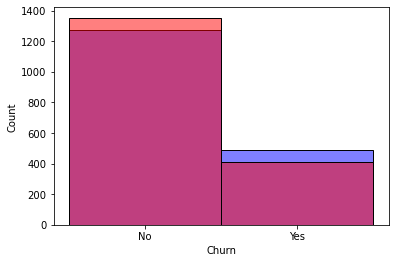

In [30]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score_lr = accuracy_score(y_test, y_test_pre)
    
print('Accuracy score for Logistic Regression: ', accuracy_score_lr)

Accuracy score for Logistic Regression:  0.7836456558773425


### KNN Classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [33]:
y_test_pre = classifier.predict(x_test_transformed)

In [34]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

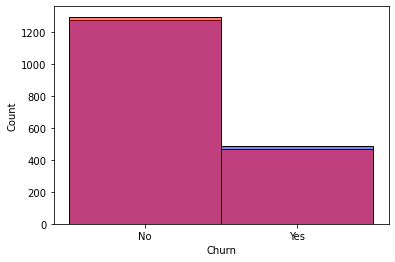

In [35]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

#### Accuracy

In [36]:
accuracy_score_knn = accuracy_score(y_test,y_test_pre)
print('acuuracy score: ',accuracy_score_knn)

acuuracy score:  0.7518455423055083


# Decision Tree classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [38]:
y_test_pre = classifier.predict(x_test_transformed)

In [39]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

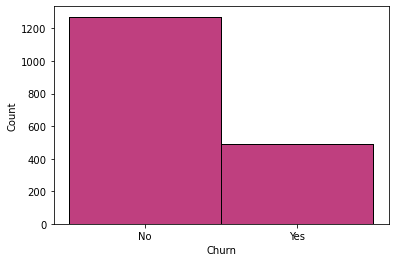

In [40]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

### Accuracy

In [41]:
accuracy_score_dtc = accuracy_score(y_test,y_test_pre)
print('accuracy score: ',accuracy_score_dtc)

accuracy score:  0.706984667802385


# Random Forest classification

In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(x_train_transformed,y_train)

RandomForestClassifier()

In [43]:
y_test_pre = classifier.predict(x_test_transformed)

In [44]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

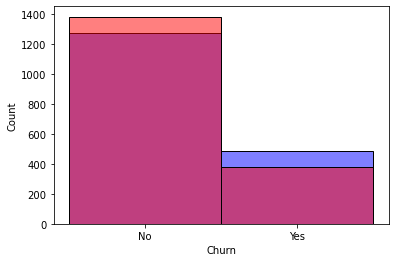

In [45]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

### Accuracy

In [46]:
accuracy_score_rfc = accuracy_score(y_test,y_test_pre)
print('accuracy score: ',accuracy_score_rfc)

accuracy score:  0.7887563884156729


# Support Vector Machines

In [47]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(x_train_transformed, y_train)

SVC(kernel='linear')

In [48]:
y_test_pre = clf.predict(x_test_transformed)

In [49]:
temp_df = pd.DataFrame({'Actual':y_test,'Predict':y_test_pre})
temp_df.head()

,Actual,Predict
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

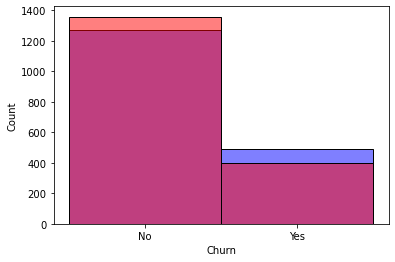

In [50]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pre, color='red',alpha=0.5)

### Accuracy

In [51]:
accuracy_score_svm = accuracy_score(y_test,y_test_pre)
print("Accuracy score for support vector mechine",accuracy_score_svm)

Accuracy score for support vector mechine 0.7734241908006815


__Step - 7:__ Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).

In [53]:
acc_data = {'Algorithem':['KNN Classification','Logistic Regression','Support Vector Mechine','Desicion Tree Classification','Random Forest Classification'],
            'accuracy_score':[accuracy_score_knn,accuracy_score_lr,accuracy_score_svm,accuracy_score_dtc,accuracy_score_rfc]}
acc_test = pd.DataFrame(acc_data)
acc_test

,Algorithem,accuracy_score
0,KNN Classification,0.751846
1,Logistic Regression,0.783646
2,Support Vector Mechine,0.773424
3,Desicion Tree Classification,0.706985
4,Random Forest Classification,0.788756


__Step - 8:__ Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Credit Risk Scoring.

<AxesSubplot:xlabel='Algorithem', ylabel='accuracy_score'>

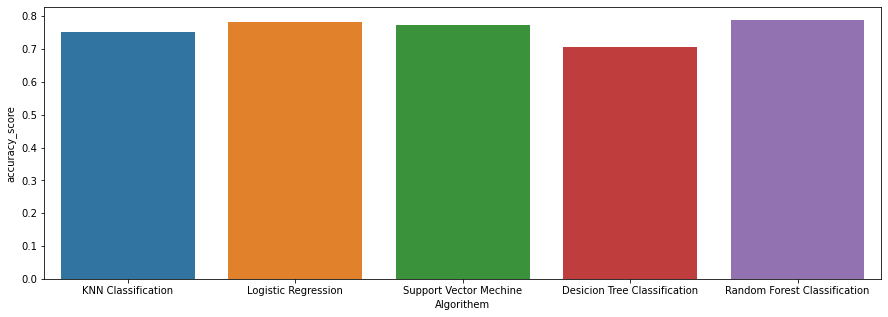

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(data=acc_test, x="Algorithem", y="accuracy_score")

- Random forest classification has maximum accuracy score when compared to other algorithems.
- i.e, for Credit risk scoring, random forest classification is best algorithem 